In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fsolve
from math import factorial as fc

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

### 3.1 Нарисуйте график функции: y(x) = k∙cos(x – a) + b 
для некоторых (2-3 различных) значений параметров k, a, b

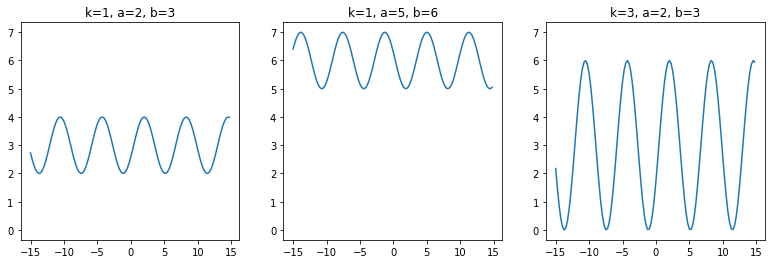

In [2]:
x = np.arange(-15, 15, 0.25)

fig = plt.figure(figsize=plt.figaspect(0.3))

ax1 = plt.subplot(131)
k = 1
a = 2
b = 3
y = k * np.cos(x - a) + b
ax1.set_title('k=1, a=2, b=3')
ax1.plot(x, y)

ax2 = plt.subplot(132, sharey=ax1)
k = 1
a = 5
b = 6
y = k * np.cos(x - a) + b
ax2.set_title('k=1, a=5, b=6')
ax2.plot(x, y)

ax3 = plt.subplot(133, sharey=ax1)
k = 3
a = 2
b = 3
y = k * np.cos(x - a) + b
ax3.set_title('k=3, a=2, b=3')
ax3.plot(x, y)

plt.show()

### 3.3.1 Напишите код, который будет переводить полярные координаты в декартовы.

x = 1.4142135623730951, y = 1.4142135623730951


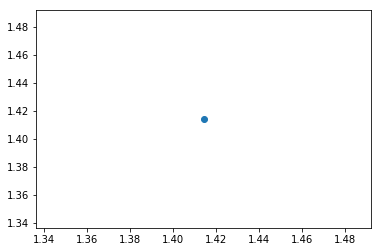

In [3]:
R = 2
PHI = np.pi / 4

x = R * np.cos(PHI)
y = R * np.sin(PHI)
print(f'x = {x}, y = {y}')

plt.plot(x, y, marker='o')
plt.show()

### 3.3.2 Напишите код, который будет рисовать график окружности в полярных координатах.

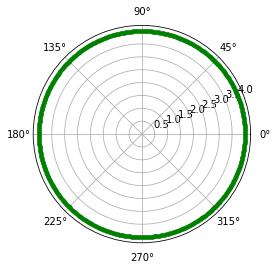

In [17]:
R = 4

t = np.linspace(0, 2 * np.pi, 1001)
for i in t:
    plt.polar(i, R, '.', color='green')

plt.axes().set_aspect('equal')
plt.show()

### 3.4.1 Решите систему уравнений: y = x^2 – 1; exp(x) + x∙(1 – y) = 1

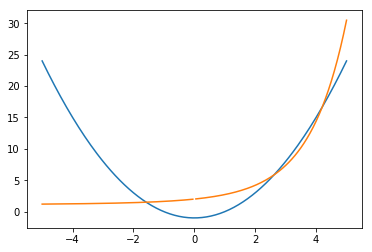

In [5]:
x = np.linspace(-5, 5, 201)
plt.plot(x, x ** 2 - 1)
plt.plot(x, (np.exp(x) - 1) / x + 1)
plt.show()

In [6]:
def f(xy):
    x, y = xy
    return(x ** 2 - y - 1, np.exp(x) + x * (1 - y) - 1)

x1, y1 = fsolve(f, (2, 5))
print(f'x1 = {x1}, y1 = {y1}')

x1 = 2.6181455730830665, y1 = 5.854686241850253


### 3.4.2 Решите систему уравнений и неравенств: y = x^2 – 1; exp(x) + x∙(1 – y) > 1

In [7]:
def f(xy):
    x, y = xy
    return(x ** 2 - y - 1, np.exp(x) + x * (1 - y) - 1 - 1)

x1, y1 = fsolve(f, (2, 5))
print(f'x1 = {x1}, y1 = {y1}')

x1 = 2.399806503034354, y1 = 4.759071252056971


### 4.1 Напишите код, моделирующий выпадение поля в рулетке (с учетом поля зеро).

In [8]:
CELLS = 36
print(f'Выпало: {np.random.randint(0, CELLS + 1)}')

Выпало: 36


### 4.2.1 Напишите код, проверяющий любую из теорем сложения или умножения вероятности на примере подбрасывания монетки.

In [9]:
N = 1000
he, ta = 0, 0

for i in range(0, N):
    x = np.random.uniform(0, 10)
    if x < 5:
        he += 1
    else:
        ta += 1
        
print(f'Всего бросков: {N}.\nОрел выпал {he} раз(а), а решка {ta} раз(а).\n')
print(f'Теорема сложения вероятностей: {(he + ta) / N == he / N + ta / N}!')


Всего бросков: 1000.
Орел выпал 493 раз(а), а решка 507 раз(а).

Теорема сложения вероятностей: True!


### 4.2.2 Сгенерируйте десять выборок случайных чисел х0, …, х9. И постройте гистограмму распределения случайной суммы х0+х1+ …+ х9.

[0 8 1 3 2 2 4 2 5 2]
[3 6 8 1 6 8 1 4 1 2]
[1 4 8 4 0 0 1 8 3 3]
[4 4 6 3 3 3 5 2 0 2]
[5 0 7 2 4 6 0 2 4 6]
[1 1 3 2 0 1 1 7 3 6]
[1 7 5 3 0 0 2 8 0 2]
[7 7 8 8 1 3 1 3 3 3]
[3 5 0 3 7 0 2 8 2 8]
[2 1 5 3 6 2 8 5 1 4]

[27 43 51 32 29 25 25 49 22 38]


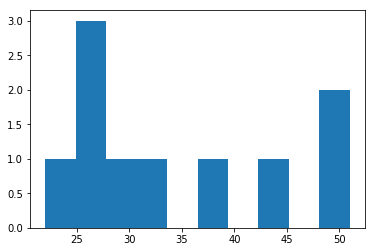

In [10]:
N = 10
ar_sum = 0

for i in range(0, N):
    ar = np.array(np.random.randint(0, 9, N))
    ar_sum += ar
    print(ar)
    
print()
print(ar_sum)

plt.hist(ar_sum, bins=len(ar_sum))
plt.show()

### 4.3 Дополните код Монте-Карло последовательности независимых испытаний расчетом соответствующих вероятностей (через биномиальное распределение) и сравните результаты.

In [11]:
N = 10000
K = 4 #кол-во испытаний
success = 2 #кол-во успехов

k = 0
x = 0

for i in range(0, K):
    ar = np.array(np.random.randint(0, 2, N))
    x += ar
    #print(i + 1, '-', ar)
#print()
#print(x)

for i in range(0, N):
    if x[i] == success:
        k = k + 1

C = fc(K)/(fc(success)*fc(K-success))
P = C*1/(2**K)

print(f'Кол-во испытаний: {K}\nКол-во успехов: {success}\n')
print(f'Фактическая вероятность: {k/N},\nВероятность по формуле Бернулли: {P}.')

Кол-во испытаний: 4
Кол-во успехов: 2

Фактическая вероятность: 0.3827,
Вероятность по формуле Бернулли: 0.375.


### 4.4 Повторите расчеты, взяв другие значения n и k.

In [12]:
K = 7
success = 3

C = fc(K) / (fc(success) * fc(K - success))
P = C * 1 / (2 ** K)

print(f'Кол-во испытаний: {K}\nКол-во успехов: {success}\n')
print(f'Вероятность по формуле Бернулли: {P}.')

Кол-во испытаний: 7
Кол-во успехов: 3

Вероятность по формуле Бернулли: 0.2734375.


### 4.5 Дополните код расчетом коэффициента корреляции x и y по формуле

0.7316479972730168 0.1412736265034593
0.7316479972730175 0.14127362650345884


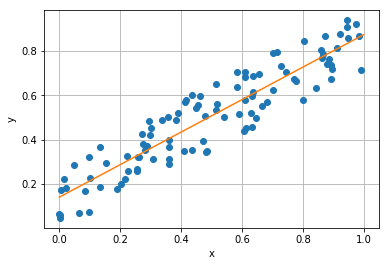

In [13]:
n = 100
r = 0.7

x = np.random.rand(n)
y = r * x + (1 - r) * np.random.rand(n)

plt.plot(x, y, 'o')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)

a = (np.sum(x) * np.sum(y) - n * np.sum(x * y)) / (np.sum(x) ** 2 - n * np.sum(x ** 2))
b = (np.sum(y) - (a * np.sum(x))) / n

A = np.vstack([x, np.ones(len(x))]).T
a1, b1 = np.linalg.lstsq(A, y)[0]

print(a, b)
print(a1, b1)

plt.plot([0, 1], [b, a + b])
plt.show()

In [14]:
xm = np.average(x)
ym = np.average(y)

R = np.sum((x - xm) * (y - ym)) / np.sqrt(np.sum((x - xm) ** 2) * (np.sum((y - ym) ** 2)))
R

0.922775342636139

In [15]:
np.corrcoef(x, y)[0, 1]

0.9227753426361395